In [49]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [80]:
import nibabel as nib
import nilearn
from nilearn import plotting

### 1 load file, get affine

In [81]:
dir = '/Users/katja/Downloads/3T/'
sub = 'T1.nii.gz'
path = "{dir}{sub}".format( dir=dir, sub=sub )
print( path )

/Users/katja/Downloads/3T/T1.nii.gz


In [82]:
anat = nib.load( path )

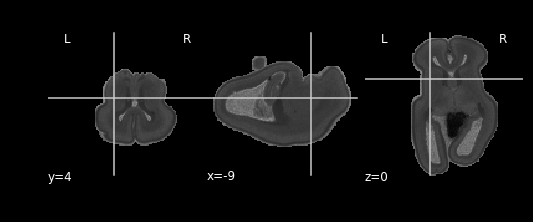

In [85]:
plotting.plot_anat( anat )

In [86]:
affine = anat.affine

In [87]:
print( affine )

[[ -0.5         -0.          -0.          27.58353424]
 [ -0.          -0.5         -0.          25.18159866]
 [  0.           0.           0.5        -33.14467239]
 [  0.           0.           0.           1.        ]]


In [88]:
hdr = anat.header

In [89]:
print( hdr )

<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : 
db_name         : 
extents         : 0
session_error   : 0
regular         : 
dim_info        : 0
dim             : [  3 128 128 128   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : float32
bitpix          : 32
slice_start     : 0
pixdim          : [ 1.     0.5    0.5    0.5    0.025  1.     1.     1.   ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 10
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : FreeSurfer Jan 19 2017
aux_file        : 
qform_code      : scanner
sform_code      : scanner
quatern_b       : 0.0
quatern_c       : 0.0
quatern_d       : 1.0
qoffset_x       : 27.5835342407
qoffset_y       : 25.1815986633
qoffset_z       :

### 2 change sform

In [90]:
print( affine[0] )

[ -0.5         -0.          -0.          27.58353424]


In [91]:
print( affine[0][0])

-0.5


In [115]:
affine[0][0] = -1.0
affine[0][1] = 0.0
affine[0][2] = 0.0

In [116]:
print( affine[0])

[ -1.           0.           0.          27.58353424]


In [117]:
affine[1][0] = 0.0
affine[1][1] = 1.0
affine[1][2] = 0.0

In [118]:
print( affine[1])

[  0.           1.           0.          25.18159866]


In [119]:
affine[2][0] = 0.0
affine[2][1] = 0.0
affine[2][2] = -1.0

In [120]:
print( affine )

[[ -1.           0.           0.          27.58353424]
 [  0.           1.           0.          25.18159866]
 [  0.           0.          -1.         -33.14467239]
 [  0.           0.           0.           1.        ]]


In [121]:
hdr.set_sform( affine )

In [122]:
print( hdr )

<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : 
db_name         : 
extents         : 0
session_error   : 0
regular         : 
dim_info        : 0
dim             : [  3 128 128 128   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : float32
bitpix          : 32
slice_start     : 0
pixdim          : [ 1.     0.5    0.5    0.5    0.025  1.     1.     1.   ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 10
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : FreeSurfer Jan 19 2017
aux_file        : 
qform_code      : scanner
sform_code      : scanner
quatern_b       : 0.0
quatern_c       : 0.0
quatern_d       : 1.0
qoffset_x       : 27.5835342407
qoffset_y       : 25.1815986633
qoffset_z       :

In [123]:
# set sform_code and qform_code back to 'scanner'
# not necessary anymore :)

#raw = hdr.structarr
#raw['sform_code'] = 1
#raw['qform_code'] = 1

In [124]:
#print( hdr )

In [125]:
print( anat.header )

<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : 
db_name         : 
extents         : 0
session_error   : 0
regular         : 
dim_info        : 0
dim             : [  3 128 128 128   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : float32
bitpix          : 32
slice_start     : 0
pixdim          : [ 1.     0.5    0.5    0.5    0.025  1.     1.     1.   ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 10
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : FreeSurfer Jan 19 2017
aux_file        : 
qform_code      : scanner
sform_code      : scanner
quatern_b       : 0.0
quatern_c       : 0.0
quatern_d       : 1.0
qoffset_x       : 27.5835342407
qoffset_y       : 25.1815986633
qoffset_z       :

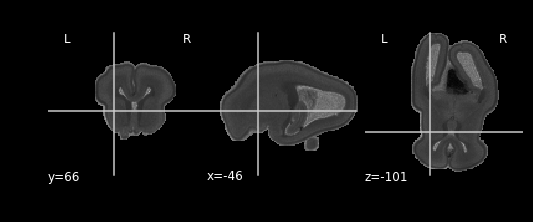

In [126]:
#print( anat )
plotting.plot_anat( anat )

### 3 save file with correct orientation

In [127]:
#path = "{dir}{sub}".format( dir=dir, sub=sub )
nib.nifti1.save(anat,'/Users/katja/Downloads/3T/T1_fixed___.nii.gz')
